In [1]:
from utils import *


In [2]:
btc = yf.Ticker("BTC-USD").history(period="30y")

btc_levels = btc['Close'].copy()
btc_levels

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2022-08-26    20260.019531
2022-08-27    20041.738281
2022-08-28    19616.814453
2022-08-29    20297.994141
2022-08-30    19635.244141
Name: Close, Length: 2905, dtype: float64

<AxesSubplot:xlabel='Date'>

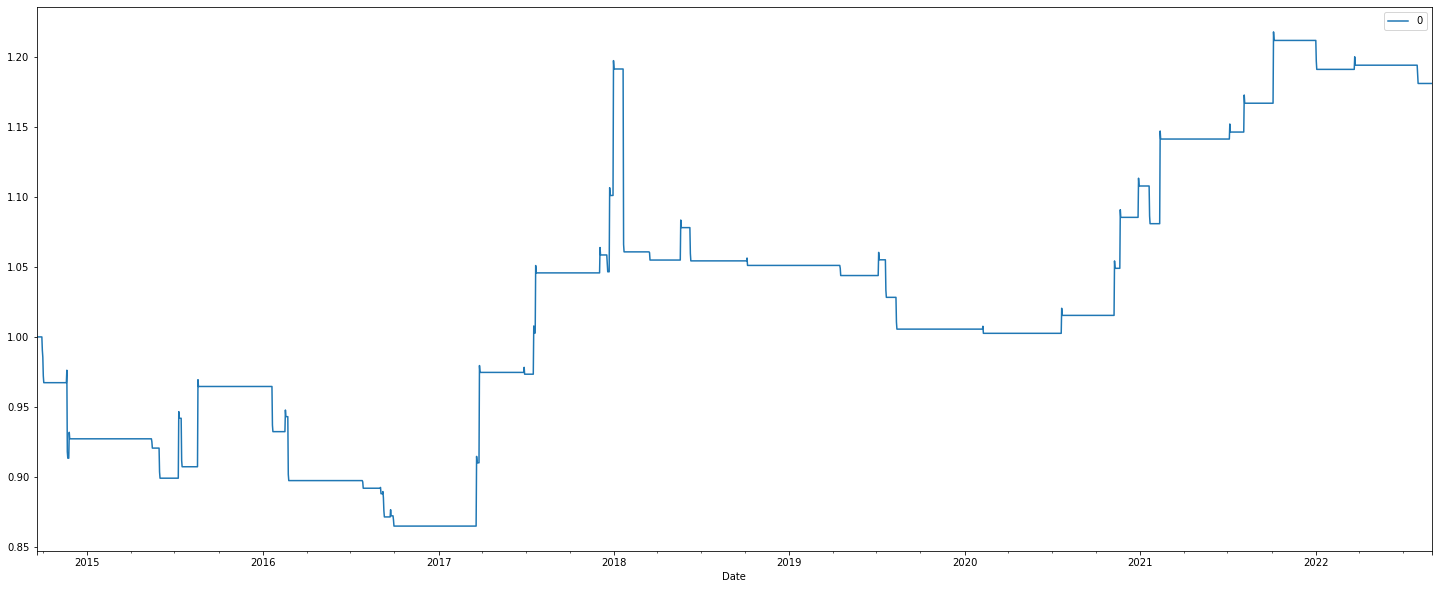

In [3]:
k = 50
n = len(btc_levels)

random.seed(3323757504729094210)  

output = sorted([1] * k + [0] * (n - k), key=lambda k: random.random())



ret_ct = backtester(output,btc_levels)

ret_ct.plot(figsize = (25,10))

In [4]:
win_rate(pd.Series(output[1:]),ret_ct)

0.00034458993797381116

In [5]:
max_dd(ret_ct.pct_change().dropna().values.ravel())

-0.16273703978594944

In [6]:
sharpe(ret_ct.pct_change().dropna())

0    0.275367
dtype: float64

In [7]:
sharpe_t_test(ret_ct.pct_change().dropna())

array([0.43738841])

In [8]:
sharpe_t_test(btc_levels.pct_change().dropna())

0.004310781110443658

In [9]:
mtt_bon({'ct' : sharpe_t_test(ret_ct.pct_change().dropna()),
         'bh': sharpe_t_test(btc_levels.pct_change().dropna())},
           n_strats =2)

{'bh': 0.008621562220887316, 'ct': array([0.87477682])}